# Let's inspect this yelp dataset

In [1]:
# !pip install datasets

In [2]:
from datasets import load_dataset

In [48]:
import pandas as pd

In [3]:
dataset = load_dataset("yelp_review_full")

Found cached dataset yelp_review_full (/Users/d/.cache/huggingface/datasets/yelp_review_full/yelp_review_full/1.0.0/e8e18e19d7be9e75642fc66b198abadb116f73599ec89a69ba5dd8d1e57ba0bf)


  0%|          | 0/2 [00:00<?, ?it/s]

In [4]:
dataset.shape, dataset.column_names

({'train': (650000, 2), 'test': (50000, 2)},
 {'train': ['label', 'text'], 'test': ['label', 'text']})

In [5]:
dataset['train'][100]["text"]

'My expectations for McDonalds are t rarely high. But for one to still fail so spectacularly...that takes something special!\\nThe cashier took my friends\'s order, then promptly ignored me. I had to force myself in front of a cashier who opened his register to wait on the person BEHIND me. I waited over five minutes for a gigantic order that included precisely one kid\'s meal. After watching two people who ordered after me be handed their food, I asked where mine was. The manager started yelling at the cashiers for \\"serving off their orders\\" when they didn\'t have their food. But neither cashier was anywhere near those controls, and the manager was the one serving food to customers and clearing the boards.\\nThe manager was rude when giving me my order. She didn\'t make sure that I had everything ON MY RECEIPT, and never even had the decency to apologize that I felt I was getting poor service.\\nI\'ve eaten at various McDonalds restaurants for over 30 years. I\'ve worked at more t

In [7]:
with open("mcdonalds_fail.txt", "w") as f:
    f.write(dataset['train'][100]["text"])

In [8]:
# Convert to pandas dataframe
df = dataset['train'].to_pandas()

In [9]:
df.head()

,label,text
0,4,dr. goldberg offers everything i look for in a...
1,1,"Unfortunately, the frustration of being Dr. Go..."
2,3,Been going to Dr. Goldberg for over 10 years. ...
3,3,Got a letter in the mail last week that said D...
4,0,I don't know what Dr. Goldberg was like before...


In [12]:
df['label'].value_counts() # 0 = 1 star, 1 = 2 star, 2 = 3 star, 3 = 4 star, 4 = 5 star

label
4    130000
1    130000
3    130000
0    130000
2    130000
Name: count, dtype: int64

In [17]:
df[df['label'] == 0]['text'].values[3]

"This place is absolute garbage...  Half of the tees are not available, including all the grass tees.  It is cash only, and they sell the last bucket at 8, despite having lights.  And if you finish even a minute after 8, don't plan on getting a drink.  The vending machines are sold out (of course) and they sell drinks inside, but close the drawers at 8 on the dot.  There are weeds grown all over the place.  I noticed some sort of batting cage, but it looks like those are out of order as well.  Someone should buy this place and turn it into what it should be."

In [19]:
df[df['label'] == 0].to_csv("yelp_1star.csv", index=False)

In [22]:
with open("yelp_1star.txt", "w") as f:
    for i in range(100):
        f.write(df[df['label'] == 0]['text'].values[i])
        f.write("\n\n")

In [23]:
df.head()

,label,text
0,4,dr. goldberg offers everything i look for in a...
1,1,"Unfortunately, the frustration of being Dr. Go..."
2,3,Been going to Dr. Goldberg for over 10 years. ...
3,3,Got a letter in the mail last week that said D...
4,0,I don't know what Dr. Goldberg was like before...


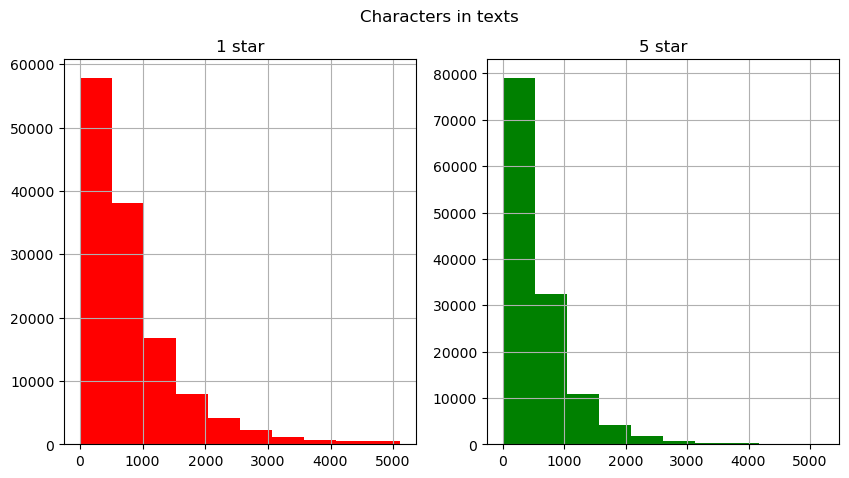

In [34]:
from matplotlib import pyplot as plt
# create histograms of the length of text for each label (1-5 stars) two plots side by side
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
df[df['label'] == 0]['text'].str.len().hist(ax=ax[0], color='red')
ax[0].set_title('1 star')
df[df['label'] == 4]['text'].str.len().hist(ax=ax[1], color='green')
ax[1].set_title('5 star')
fig.suptitle('Characters in texts')
plt.show()


In [43]:
# describe the length of text for each label
for i in [0, 4]:
    print(f"{i+1}-star reviews \n {df[df['label'] == i]['text'].str.len().describe()}")

1-star reviews 
 count    130000.000000
mean        815.307762
std         761.491098
min           1.000000
25%         308.000000
50%         581.000000
75%        1056.000000
max        5115.000000
Name: text, dtype: float64
5-star reviews 
 count    130000.000000
mean        579.838346
std         560.303570
min           1.000000
25%         220.000000
50%         408.000000
75%         741.000000
max        5214.000000
Name: text, dtype: float64


In [46]:
df_1star = df[df['label'] == 0]

In [50]:
# create a dictionary of words and their frequency in the 1-star reviews
freq_1star = pd.Series(' '.join(df_1star['text']).split()).value_counts()

In [51]:
freq_1star.shape

(515253,)

In [54]:
freq_1star

the             812005
and             582869
to              570231
I               532489
a               435294
                 ...  
John;                1
know.....\nI         1
aftger               1
anyday\".            1
RYAN,                1
Name: count, Length: 515253, dtype: int64

In [55]:
pd.Series(' '.join(df_1star['text']).split())

0                    I
1                don't
2                 know
3                 what
4                  Dr.
               ...    
19690978        OWNER,
19690979           YOU
19690980        SHOULD
19690981          KNOW
19690982    BETTER!!!!
Length: 19690983, dtype: object

In [133]:
# remove punctuation and lowercase text for 1-star reviews
import string
df_1star['text'].str.lower().str.strip(string.punctuation)

4         i dont know what dr goldberg was like before  ...
7         im writing this review to give you a heads up ...
10        owning a driving range inside the city limits ...
11        this place is absolute garbage  half of the te...
24        used to go there for tires brakes etc  their p...
                                ...                        
649980    really disappointing either the place was havi...
649988    first please note that many people are reviewi...
649996    phone calls always go to voicemail and message...
649997    looks like all of the good reviews have gone t...
649999    i have been using this company for 11 months  ...
Name: text, Length: 130000, dtype: object

In [138]:
# remove new line characters for 1-star reviews <- this isn't working
df_1star['text'].str.replace("\n", " ")

4         i dont know what dr goldberg was like before  ...
7         im writing this review to give you a heads up ...
10        owning a driving range inside the city limits ...
11        this place is absolute garbage  half of the te...
24        used to go there for tires brakes etc  their p...
                                ...                        
649980    really disappointing either the place was havi...
649988    first please note that many people are reviewi...
649996    phone calls always go to voicemail and message...
649997    looks like all of the good reviews have gone t...
649999    i have been using this company for 11 months  ...
Name: text, Length: 130000, dtype: object

In [147]:
df_1star['text']

4         i dont know what dr goldberg was like before  ...
7         im writing this review to give you a heads up ...
10        owning a driving range inside the city limits ...
11        this place is absolute garbage  half of the te...
24        used to go there for tires brakes etc  their p...
                                ...                        
649980    really disappointing either the place was havi...
649988    first please note that many people are reviewi...
649996    phone calls always go to voicemail and message...
649997    looks like all of the good reviews have gone t...
649999    i have been using this company for 11 months  ...
Name: text, Length: 130000, dtype: object

In [139]:
pd.Series(' '.join(df_1star['text']).split())

0                i
1             dont
2             know
3             what
4               dr
             ...  
19669085     owner
19669086       you
19669087    should
19669088      know
19669089    better
Length: 19669090, dtype: object

In [140]:
freq_1star = pd.Series(' '.join(df_1star['text']).split()).value_counts()

In [141]:
freq_1star.shape

(287555,)

In [148]:
freq_1star[-50:]

thousand-calorie      1
\nahh                 1
retreadsome           1
bathbombs             1
skindrink             1
few\nparabens         1
organic/all           1
car-jacked            1
knifepoint            1
fabulous\n\ndo        1
\n\ncamera            1
\ncraigslist          1
work\nbring           1
off-the-clock         1
gank                  1
klassy\n\nand         1
gang-infested         1
scarey-ass            1
btw\n\nthis           1
hey-day               1
1975-1985             1
movieand              1
00s                   1
holdups               1
product-buying        1
mud\nshe              1
obererons             1
ground\n\nonce        1
\n\nmenus             1
colts-                1
laterwhich            1
terrible\n\nsalsa     1
leave\ni              1
3pm-6pm\              1
\correcting\          1
ayesha                1
ball\n\n-             1
fry/microwave         1
review\n\njenna       1
something\n\nupon     1
message\ni            1
message\n\nfinal